### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### loading data

In [2]:
sales_data = pd.read_csv('./data/sales.csv')
employees_data = pd.read_csv('./data/employees.csv')
customers_data = pd.read_csv('./data/customers.csv')
products_data = pd.read_csv('./data/products.csv')

In [3]:
# checking for missing values
sales_data.isnull().sum()

# Convert data types
sales_data['SaleDate'] = pd.to_datetime(sales_data['SaleDate'])


### analysis

## Sales analysis

#### a. Sales Trends Over Time


Monthly Sales Trends Over Time:
Year  Month
2023  2         45.75
      3        220.00
      4        180.25
      5         90.50
      6        120.00
      7         50.75
      8        300.00
      9         75.25
      10       200.50
      11       150.00
Name: SaleAmount, dtype: float64


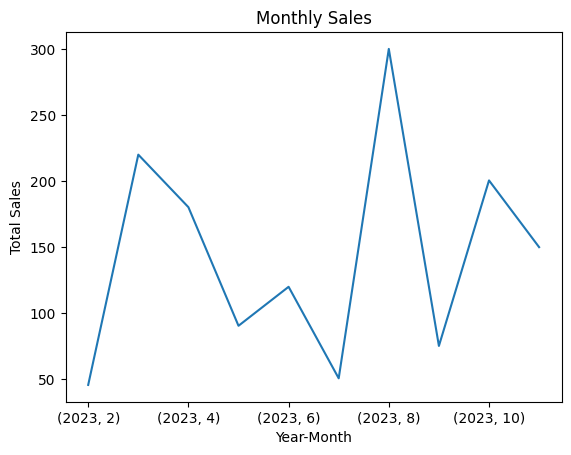

In [4]:
# Extract year and month from SaleDate
sales_data['Year'] = sales_data['SaleDate'].dt.year
sales_data['Month'] = sales_data['SaleDate'].dt.month

# Group by Year and Month, then sum SaleAmount
monthly_sales = sales_data.groupby(['Year', 'Month'])['SaleAmount'].sum()

print("Monthly Sales Trends Over Time:")
print(monthly_sales)

# Plot monthly sales
monthly_sales.plot(kind='line')
plt.title('Monthly Sales')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()


#### b. Top Performing Products


Top Performing Products by Sales:
ProductID
104    300.00
109    220.00
102    200.50
108    180.25
101    150.00
106    120.00
107     90.50
103     75.25
105     50.75
110     45.75
Name: SaleAmount, dtype: float64


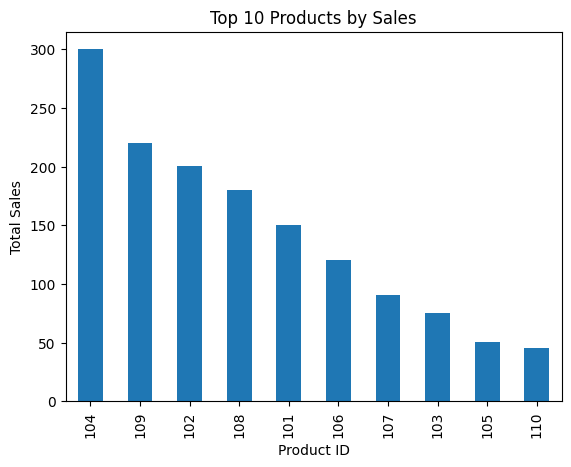

In [5]:
top_products = sales_data.groupby('ProductID')['SaleAmount'].sum().sort_values(ascending=False).head(10)

print("Top Performing Products by Sales:")
print(top_products)

top_products.plot(kind='bar')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()


#### c. Employee Performance


Employee Performance based on Sales:
EmployeeID
204    300.00
209    220.00
202    200.50
208    180.25
201    150.00
206    120.00
207     90.50
203     75.25
205     50.75
210     45.75
Name: SaleAmount, dtype: float64


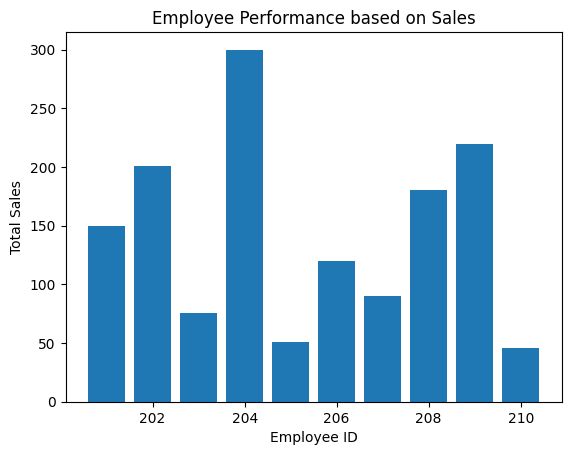

In [6]:
employee_performance = sales_data.groupby('EmployeeID')['SaleAmount'].sum().sort_values(ascending=False)

print("Employee Performance based on Sales:")
print(employee_performance)

plt.bar(employee_performance.index, employee_performance.values)
plt.title('Employee Performance based on Sales')
plt.xlabel('Employee ID')
plt.ylabel('Total Sales')
plt.show()


## Customer analysis

Registration Year Distribution:
RegistrationYear
2022    4
2021    3
2023    2
2020    1
Name: count, dtype: int64


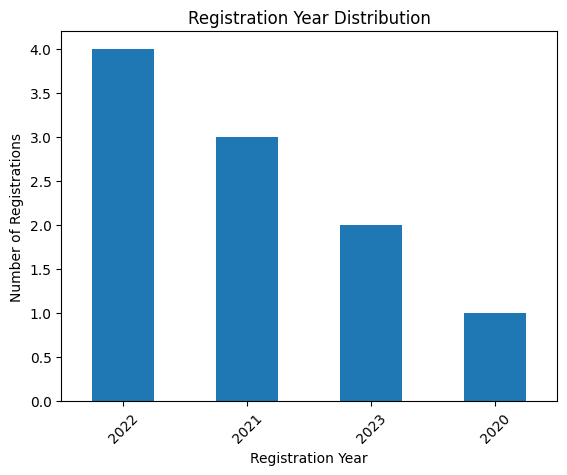

Total Amount Spent by Customers Distribution:
0    1250.00
1    2300.50
2     950.25
3    1875.00
4    1420.75
5    1980.00
6    1675.50
7    2150.25
8    1200.00
9     800.75
Name: TotalSpent, dtype: float64


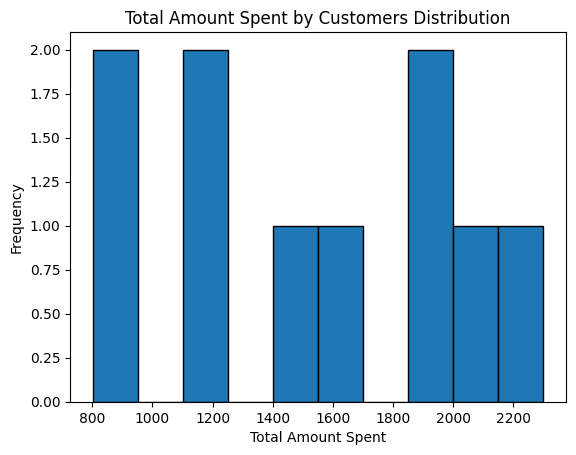

Top 10 Email Domains of Customers:
EmailDomain
gmail.com      3
outlook.com    3
yahoo.com      2
mut.ac.uk      2
Name: count, dtype: int64


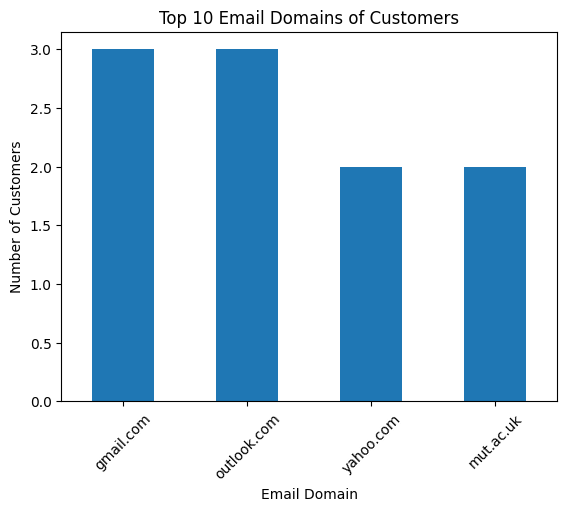

In [7]:
# a. Registration Year Distribution

# Extract the registration year from RegistrationDate
customers_data['RegistrationYear'] = pd.to_datetime(customers_data['RegistrationDate']).dt.year

# Count the number of registrations in each year
registration_year_counts = customers_data['RegistrationYear'].value_counts()

print("Registration Year Distribution:")
print(registration_year_counts)

# Plot a bar chart for registration year distribution
registration_year_counts.plot(kind='bar')
plt.title('Registration Year Distribution')
plt.xlabel('Registration Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45)
plt.show()
# This analysis will show the distribution of customer registrations across different years.

# b. Total Spent by Customers

print("Total Amount Spent by Customers Distribution:")
print(customers_data['TotalSpent'])

# Plot a histogram for the distribution of total amount spent by customers
plt.hist(customers_data['TotalSpent'], bins=10, edgecolor='k')
plt.title('Total Amount Spent by Customers Distribution')
plt.xlabel('Total Amount Spent')
plt.ylabel('Frequency')
plt.show()
# This analysis will visualize the distribution of the total amount spent by customers.

# c. Email Domains Distribution
# Extract the email domains from the 'Email' column
customers_data['EmailDomain'] = customers_data['Email'].str.split('@').str[1]

# Count the number of customers for each email domain
email_domain_counts = customers_data['EmailDomain'].value_counts().head(10)

print("Top 10 Email Domains of Customers:")
print(email_domain_counts)

# Plot a bar chart for the top 10 email domains
email_domain_counts.plot(kind='bar')
plt.title('Top 10 Email Domains of Customers')
plt.xlabel('Email Domain')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

## Employees Analysis


Department-wise Employee Count:
DepartmentID
1    4
2    3
3    3
Name: count, dtype: int64


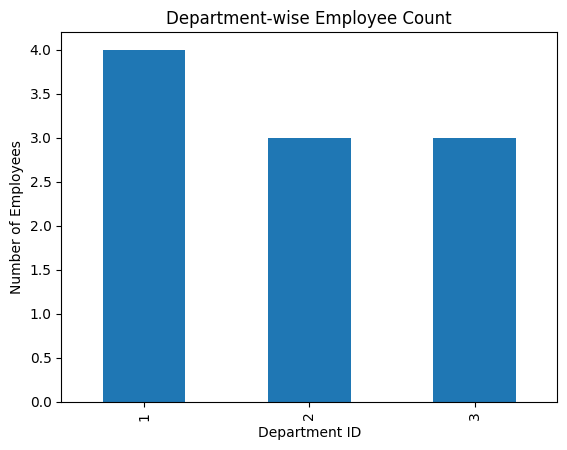

Average Salary by Department:
DepartmentID
1    54250.000000
2    59000.000000
3    62666.666667
Name: Salary, dtype: float64


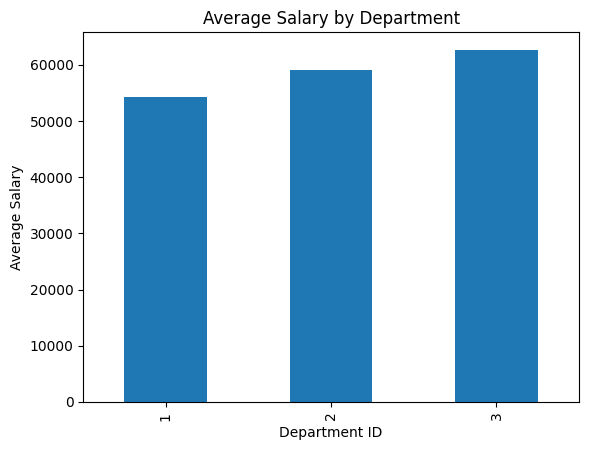

Employee Tenure Distribution:
0    1.712329
1    2.531507
2    0.887671
3    0.273973
4    1.035616
5    1.405479
6    0.586301
7    1.424658
8    0.791781
9    1.241096
Name: Tenure, dtype: float64


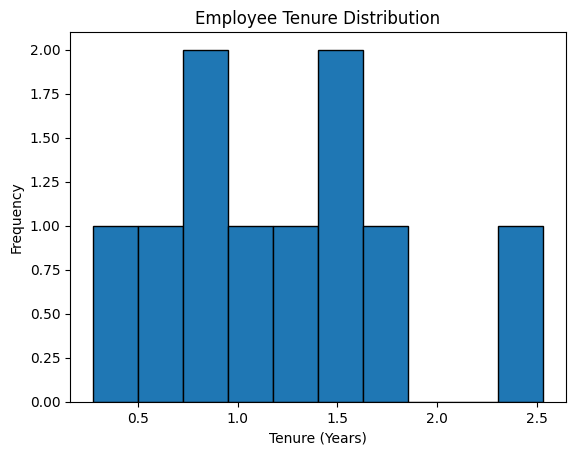

In [8]:
# a. Department-wise Employee Count

# Count the number of employees in each department
department_counts = employees_data['DepartmentID'].value_counts()

print("Department-wise Employee Count:")
print(department_counts)

# Plot a bar chart for department-wise employee count
department_counts.plot(kind='bar')
plt.title('Department-wise Employee Count')
plt.xlabel('Department ID')
plt.ylabel('Number of Employees')
plt.show()
# This analysis will show the distribution of employees across different departments.

# b. Average Salary by Department

# Calculate the average salary for each department
average_salary_by_department = employees_data.groupby('DepartmentID')['Salary'].mean()

print("Average Salary by Department:")
print(average_salary_by_department)

# Plot a bar chart for average salary by department
average_salary_by_department.plot(kind='bar')
plt.title('Average Salary by Department')
plt.xlabel('Department ID')
plt.ylabel('Average Salary')
plt.show()
# This analysis will display the average salary for each department.

# c. Employee Tenure Distribution

# Convert HireDate to datetime
employees_data['HireDate'] = pd.to_datetime(employees_data['HireDate'])

# Calculate the tenure (in years) for each employee
current_date = pd.to_datetime('2023-11-30')
employees_data['Tenure'] = (current_date - employees_data['HireDate']).dt.days / 365

print("Employee Tenure Distribution:")
print(employees_data['Tenure'])

# Plot a histogram for the distribution of employee tenure
plt.hist(employees_data['Tenure'], bins=10, edgecolor='k')
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')
plt.show()
# This analysis will visualize the distribution of employee tenures in years.

## Products analysis

Product Categories Distribution:
Category
Electronics    4
Appliances     3
Furniture      2
Sports         1
Name: count, dtype: int64


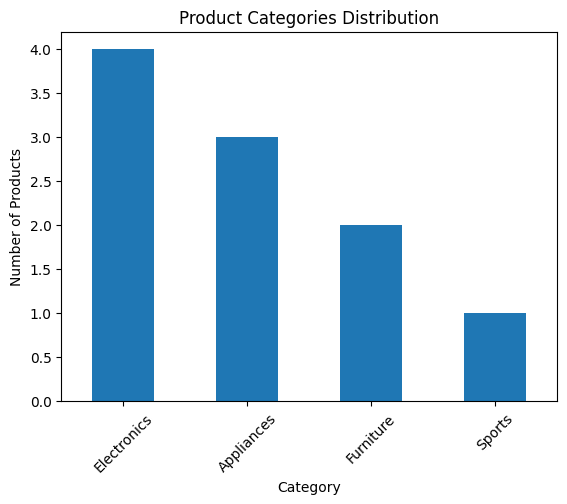

Average Unit Price by Category:
Category
Appliances     296.666667
Electronics    412.500000
Furniture      350.000000
Sports          80.000000
Name: UnitPrice, dtype: float64


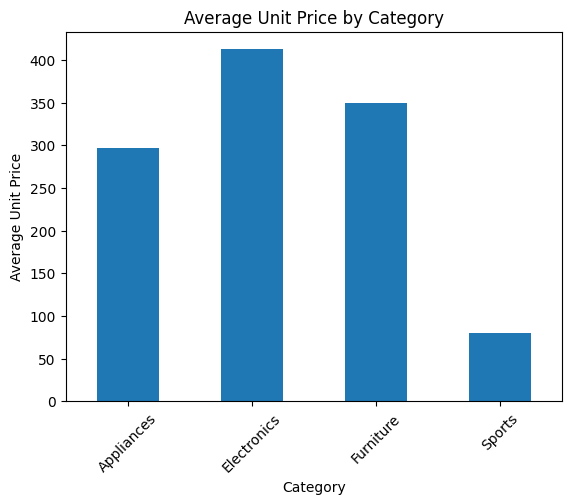

Stock Quantity Distribution:
0     50
1     75
2     30
3     20
4    100
5     15
6     40
7     60
8     55
9     45
Name: StockQuantity, dtype: int64


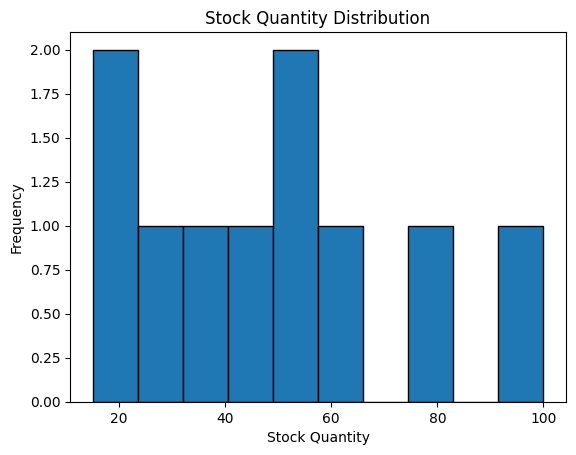

In [9]:
# a. Product Categories Distribution

# Count the number of products in each category
category_counts = products_data['Category'].value_counts()

print("Product Categories Distribution:")
print(category_counts)

# Plot a bar chart for product category distribution
category_counts.plot(kind='bar')
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()
# This analysis will show the distribution of products across different categories.

# b. Average Unit Price by Category

# Calculate the average unit price for each product category
average_price_by_category = products_data.groupby('Category')['UnitPrice'].mean()

print("Average Unit Price by Category:")
print(average_price_by_category)

# Plot a bar chart for average unit price by category
average_price_by_category.plot(kind='bar')
plt.title('Average Unit Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=45)
plt.show()
# This analysis will display the average unit price for each product category.

# c. Stock Quantity Distribution

print("Stock Quantity Distribution:")
print(products_data['StockQuantity'])

# Plot a histogram for the distribution of stock quantities
plt.hist(products_data['StockQuantity'], bins=10, edgecolor='k')
plt.title('Stock Quantity Distribution')
plt.xlabel('Stock Quantity')
plt.ylabel('Frequency')
plt.show()
# This analysis will visualize the distribution of stock quantities for the products.